In [ ]:
# Trong phần này, tôi sẽ chọn một ví dụ đơn giản về việc giải bài toán Linear Regression trong Python. Tôi cũng sẽ so sánh nghiệm của bài toán khi giải theo phương trình (5) và nghiệm tìm được khi dùng thư viện scikit-learn của Python. (Đây là thư viện Machine Learning được sử dụng rộng rãi trong Python). Trong ví dụ này, dữ liệu đầu vào chỉ có 1 giá trị (1 chiều) để thuận tiện cho việc minh hoạ trong mặt phẳng.

# Chúng ta có 1 bảng dữ liệu về chiều cao và cân nặng của 15 người như trong bảng dưới đây:

# Chiều cao (cm)	147	150	153	155	158	160	163	165
# Cân nặng (kg)	49	50	51	52	54	56	58	59
# Chiều cao (cm)	168	170	173	175	178	180	183
# Cân nặng (kg)	60	62	63	64	66	67	68
# Bài toán đặt ra là: liệu có thể dự đoán cân nặng của một người dựa vào chiều cao của họ không? (Trên thực tế, tất nhiên là không, vì cân nặng còn phụ thuộc vào nhiều yếu tố khác nữa, thể tích chẳng hạn). Vì blog này nói về các thuật toán Machine Learning đơn giản nên tôi sẽ giả sử như chúng ta có thể dự đoán được.

# Chúng ta có thể thấy là cân nặng sẽ tỉ lệ thuận với chiều cao (càng cao càng nặng), nên có thể sử dụng Linear Regression model cho việc dự đoán này. Để kiểm tra độ chính xác của model tìm được, chúng ta sẽ giữ lại cột 155 và 160 cm để kiểm thử, các cột còn lại được sử dụng để huấn luyện (train) model.

# Trước tiên, chúng ta cần có hai thư viện numpy cho đại số tuyến tính và matplotlib cho việc vẽ hình.

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

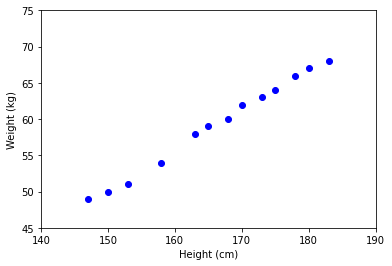

In [10]:
# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg)
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T
# Visualize data 
plt.plot(X, y, 'bo')#bo is fmt(format), meaning blue circle marker
plt.axis([140, 190, 45, 75])#xmin, xmax, ymin, ymax = limits
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [ ]:
# Từ đồ thị này ta thấy rằng dữ liệu được sắp xếp gần như theo 1 đường thẳng, vậy mô hình Linear Regression nhiều khả năng sẽ cho kết quả tốt:

# (cân nặng) = w_1*(chiều cao) + w_0)

# Tiếp theo, chúng ta sẽ tính toán các hệ số a và b dựa vào công thức (5).

w =  [[-33.73541021]
 [  0.55920496]]


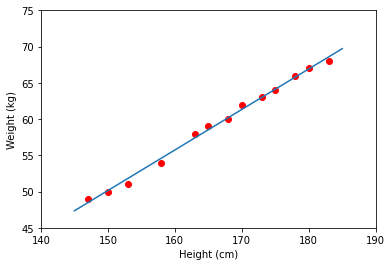

In [8]:
# Building Xbar 
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

# Calculating weights of the fitting line 
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print ('w = ', w)
# Preparing the fitting line 
w_0 = w[0]
w_1 = w[1]
x0 = np.linspace(145, 185, 2, endpoint=True)
y0 = w_0 + w_1*x0

# Drawing the fitting line 
plt.plot(X.T, y.T, 'ro')     # data 
plt.plot(x0, y0)               # the fitting line
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [ ]:
# Từ đồ thị bên trên ta thấy rằng các điểm dữ liệu màu đỏ nằm khá gần đường thẳng dự đoán màu xanh. 
# Vậy mô hình Linear Regression hoạt động tốt với tập dữ liệu training. Bây giờ, chúng ta sử dụng mô hình này 
# để dự đoán cân nặng của hai người có chiều cao 155 và 160 cm mà chúng ta đã không dùng khi tính toán nghiệm.

In [ ]:
y1 = w_1*155 + w_0
y2 = w_1*160 + w_0

print(u'Dự đoán cân nặng của người có chiều cao 155 cm: %.2f (kg), số liệu thật: 52 (kg)'  %(y1) )
print(u'Dự đoán cân nặng của người có chiều cao 160 cm: %.2f (kg), số liệu thật: 56 (kg)'  %(y2) )

In [6]:
from sklearn import datasets, linear_model

# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, y)

# Compare two results
print(u'Nghiệm tìm được bằng scikit-learn  : ', regr.coef_ )
print(u'Nghiệm tìm được từ phương trình (5): ', w.T)

Nghiệm tìm được bằng scikit-learn  :  [[-33.73541021   0.55920496]]
Nghiệm tìm được từ phương trình (5):  [[-33.73541021   0.55920496]]


w =  [[22.21867545]
 [ 0.23775985]]


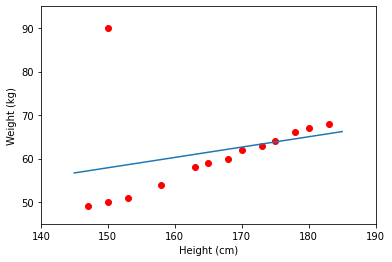

In [8]:
# Linear Regression rất nhạy cảm với nhiễu
# Trong trường hợp có nhiễu, với một cặp dữ liệu (150 cm, 70kg), kết quả đã sai lệch đi rất nhiều.
import numpy as np 
import matplotlib.pyplot as plt

# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183, 150]]).T
# weight (kg)
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68, 90]]).T

# Building Xbar 
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

# Calculating weights of the fitting line 
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print ('w = ', w)
# Preparing the fitting line 
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(145, 185, 2, endpoint=True)
y0 = w_0 + w_1*x0

# Drawing the fitting line 
plt.plot(X, y, 'ro')     # data 
plt.plot(x0, y0)               # the fitting line
plt.axis([140, 190, 45, 95])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()